# Rock Paper Scissor

## Importing libraries

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator

In [2]:
btch = 32

## Data Preprocessing

### Training Data

In [3]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        shear_range=0.2,
        zoom_range=0.2,
        fill_mode = 'wrap',
        horizontal_flip=True)
training_set = train_datagen.flow_from_directory(
        'dataset/training_set',
        target_size=(64, 96),
        color_mode='grayscale',
        batch_size=btch,
        class_mode='categorical')

Found 2520 images belonging to 3 classes.


### Test Data

In [4]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
        'dataset/test_set',
        target_size=(64, 96),
        color_mode='grayscale',
        batch_size=btch,
        class_mode='categorical')

Found 372 images belonging to 3 classes.


## Building the CNN

### Initialize the CNN

In [5]:
cnn = tf.keras.models.Sequential()

### Adding Hidden Layer 1

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters = 16, kernel_size = 3, activation = 'relu', input_shape = [64,96,1]))

### Adding Max Pool Layer 1

In [7]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size = (2,2)))

### Adding Hidden Layer 2

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu'))

### Adding Max Pool Layer 2

In [9]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size = (2,2), strides = 2))

### Hidden Layer 3 and Max Pool Layer 3

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, activation = 'relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = (2,2), strides = 2))

### Flattening

In [11]:
cnn.add(tf.keras.layers.Flatten())

### Fully Connected Layer 

In [12]:
cnn.add(tf.keras.layers.Dense(units = 512, activation = 'relu'))

### Output Layer

In [13]:
cnn.add(tf.keras.layers.Dense(units = 3, activation = 'softmax'))

In [14]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 94, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 47, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 45, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 22, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 20, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 10, 64)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3840)              0

## Compiling the Neural Net

In [15]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Training the Neural Net

In [31]:
cnn.fit(x = training_set, validation_data = test_set, steps_per_epoch = 78, epochs = 35, validation_steps = 372/32)

Epoch 1/35
78/78 [==============================] - 11s 137ms/step - loss: 0.0045 - accuracy: 0.9980 - val_loss: 0.1040 - val_accuracy: 0.9597
Epoch 2/35
78/78 [==============================] - 11s 140ms/step - loss: 0.0039 - accuracy: 0.9984 - val_loss: 0.1852 - val_accuracy: 0.9355
Epoch 3/35
78/78 [==============================] - 11s 140ms/step - loss: 0.0013 - accuracy: 0.9996 - val_loss: 0.1372 - val_accuracy: 0.9462
Epoch 4/35
78/78 [==============================] - 12s 148ms/step - loss: 0.0114 - accuracy: 0.9976 - val_loss: 0.1430 - val_accuracy: 0.9489
Epoch 5/35
78/78 [==============================] - 12s 157ms/step - loss: 0.0194 - accuracy: 0.9924 - val_loss: 0.1066 - val_accuracy: 0.9516
Epoch 6/35
78/78 [==============================] - 14s 174ms/step - loss: 0.0169 - accuracy: 0.9936 - val_loss: 0.1018 - val_accuracy: 0.9677
Epoch 7/35
78/78 [==============================] - 12s 156ms/step - loss: 0.0214 - accuracy: 0.9924 - val_loss: 0.2725 - val_accuracy: 0.8602

### Evaluating Neural Net on Test set

In [17]:
score = cnn.evaluate(test_set, batch_size = 8, steps = 20)
print()
print('Test accuracy: ', score[1])

20/20 [==============================] - 1s 72ms/step - loss: 0.1207 - accuracy: 0.9334

Test accuracy:  0.9334415793418884


## Serialize model to JSON

In [36]:
model_json = cnn.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

## Serialize weights to HDF5

In [37]:
cnn.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


2


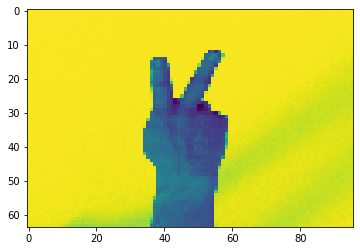

In [35]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
test_image = image.load_img('dataset/validation/scissors1.png',color_mode='grayscale' ,target_size = (64, 96))
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
num = result.argmax()
if num == 0:
    prediction='paper'
elif num==1:
    prediction='rock'
else:
    prediction='scissor'
print(num)

In [26]:
test_set.class_indices

{'paper': 0, 'rock': 1, 'scissors': 2}